# Neural Network for Coupling prediction

## Data preprocessing

Importing the necessary libraries

In [25]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Importing datatset as Pandas dataframe and visualizing the first 5 rows

In [26]:
data = pd.read_csv("Datasets/COMPLETE_FULLDATA.csv",sep=";", decimal='.')
data.head()

,DIMERS,Xshift,Yshift,Zshift,alpha_deg,CPL,1st_exc_en,1st_exc_f,2nd_exc_en,2nd_exc_f,exc_split
0,ND3X0.0,-0.000358,-0.000230,3.0,0,0.006596,1.671243,0.000055,2.039965,0.712887,0.368723
1,ND3X0.2,-0.000358,0.539103,3.0,0,0.006328,1.689789,0.000402,2.040880,0.712912,0.351091
2,ND3X0.4,-0.000358,1.078436,3.0,0,0.005679,1.718518,0.000387,2.031394,0.708976,0.312876
3,ND3X0.6,-0.000358,1.617770,3.0,0,0.004892,1.769175,0.000005,2.034753,0.714190,0.265579
4,ND3X0.8,-0.000358,2.157103,3.0,0,0.004065,1.804709,0.000001,2.026748,0.710577,0.222039


Visualizing dataset dimensions

In [27]:
data.shape

(10560, 11)

Visualizing available angles

In [28]:
data['alpha_deg'].unique()

array([  0,   5,  10,  15,  30,  45,  60,  70,  80,  90, 100, 110, 120,
       150, 180, 210, 240, 270, 300, 330], dtype=int64)

Creating reduced dataset by removing angles

In [29]:
removed_angles = [100]
data_removed = data[~data['alpha_deg'].isin(removed_angles)]

Input features and output variable selection

In [30]:
X = data_removed[["Xshift","Yshift","Zshift","alpha_deg"]].values
Y = data_removed["CPL"].values*1000 #mev multiplication

Splitting of the data into train set and test set

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X.astype(float) ,Y, test_size=0.2)

Scaling of input features

In [32]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

## Neural Network

Building of the Neural Network architecture

In [33]:
model = Sequential()
model.add(Dense(512, input_shape=(4,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

Configuration of the model for training

In [34]:
model.compile(loss='mse', optimizer='adam')

A brief summary of the model

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               2560      
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 128)               32896     
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 177,153
Trainable params: 177,153
Non-tr

Number of epochs used for training

In [36]:
num_epochs = 500

Neural Network training

In [37]:
history = model.fit(X_train,y_train,epochs=num_epochs,validation_split = 0.1)

Epoch 1/500
226/226 [==============================] - 3s 8ms/step - loss: 1.4271 - val_loss: 1.0527
Epoch 2/500
226/226 [==============================] - 2s 9ms/step - loss: 1.1726 - val_loss: 0.9147
Epoch 3/500
226/226 [==============================] - 3s 12ms/step - loss: 1.0857 - val_loss: 0.8891
Epoch 4/500
226/226 [==============================] - 2s 7ms/step - loss: 0.9994 - val_loss: 0.9021
Epoch 5/500
226/226 [==============================] - 2s 8ms/step - loss: 0.9608 - val_loss: 0.7909
Epoch 6/500
226/226 [==============================] - 2s 7ms/step - loss: 0.9226 - val_loss: 0.7949
Epoch 7/500
226/226 [==============================] - 2s 7ms/step - loss: 0.9132 - val_loss: 0.7735
Epoch 8/500
226/226 [==============================] - 2s 7ms/step - loss: 0.8852 - val_loss: 0.8719
Epoch 9/500
226/226 [==============================] - 2s 8ms/step - loss: 0.8797 - val_loss: 0.7625
Epoch 10/500
226/226 [==============================] - 2s 7ms/step - loss: 0.8705 - val_l

# Model Evaluation

In [38]:
#Model testing
test_eval = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 4ms/step - loss: 0.0068


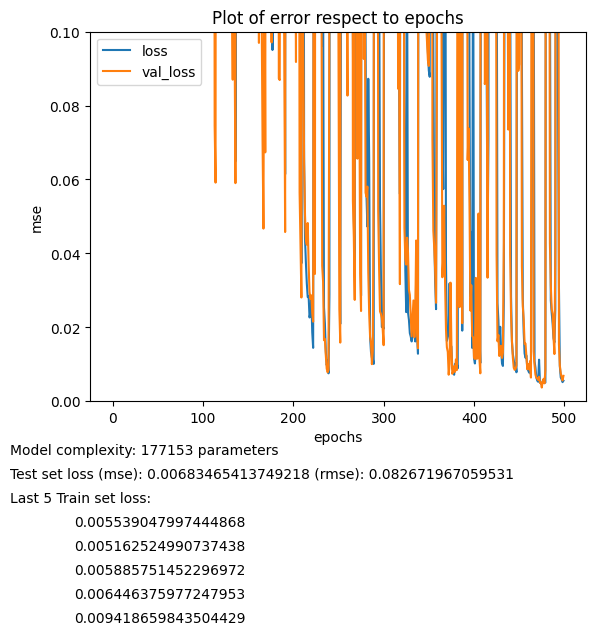

In [39]:
#plotting of training information
plt.plot(range(num_epochs),history.history['loss'])
plt.plot(range(num_epochs),history.history['val_loss'])
plt.legend(["loss","val_loss"])
plt.ylabel('mse')
plt.xlabel('epochs')
plt.title('Plot of error respect to epochs')
plt.ylim([0, 1e-1])
plt.figtext(0, 0, "Model complexity: "+str(model.count_params())+" parameters", fontsize=10)
plt.figtext(0, -0.05, "Test set loss (mse): "+str(test_eval)+" (rmse): "+str(math.sqrt(test_eval)), fontsize=10)
plt.figtext(0, -0.1, "Last 5 Train set loss:", fontsize=10)
plt.figtext(0.1, -0.15, str(history.history['loss'][-1]), fontsize=10)
plt.figtext(0.1, -0.2, str(history.history['loss'][-2]), fontsize=10)
plt.figtext(0.1, -0.25, str(history.history['loss'][-3]), fontsize=10)
plt.figtext(0.1, -0.3, str(history.history['loss'][-4]), fontsize=10)
plt.figtext(0.1, -0.35, str(history.history['loss'][-5]), fontsize=10)
plt.show()

# Empirical testing

In this part, model can be evaluated with empirical examples

In [40]:
#emp_test = np.array([-2.9219,3.009,4.4996,45])
#emp_test = np.reshape(emp_test,(1,4))
#emp_test = ss.transform(emp_test)

In [41]:
#model.predict(emp_test)

# Scatter plot

In [42]:
#Function that returns all the predictions of train set into a list
def predictions(X_test):
    pred = []

    for i in range(0,X_test.shape[0]):
        k = X_test[i]
        k = np.reshape(k,(1,4))
        #k = ss.transform(k)
        pred.append(float(model.predict(k))) 
    return pred

In [43]:
pred = predictions(X_test)

1/1 [==============================] - 0s 40ms/step


In [44]:
#mse test(to check if predictions are good)
mse = (y_test-pred)**2
np.sum(mse)/mse.shape[0]

0.006834656113907299

In [45]:
for i in range(0,len(pred)):
    print(X_test[i],y_test[i],pred[i])

[ 0.93433417  0.21790465 -0.704924    1.1495182 ] -0.63405 -0.5983940362930298
[ 1.00160254  2.25099099 -1.15995684  0.26986411] -1.0372599999999998 -1.1235456466674805
[ 0.9855913  -0.50699161  0.20515896 -0.41431129] -0.31134 -0.3152577877044678
[ 0.9856265  -0.82461409 -0.24988298 -0.41431129] -0.45067 -0.44245266914367676
[ 0.50746826 -0.90324892  0.20502427  0.56308214] 1.74334 1.8135915994644165
[-0.29798733 -0.98863261 -0.25026976 -0.51205063] -0.64423 -0.731293797492981
[ 0.98612159 -0.90316999 -1.38747826  0.56308214] 6.52 6.077247619628906
[-0.08561495  0.02019711  0.65995381 -1.04961702] 0.65489 0.7059156894683838
[0.93415761 0.21779187 1.57028568 1.1495182 ] -0.25781000000000004 -0.23070275783538818
[ 0.60256619 -0.98594019  0.6600926  -1.14735636] -1.32998 -1.3407058715820312
[-1.14397039 -0.99044131 -1.38812442 -1.04961702] 1.7684199999999999 1.7568539381027222
[ 0.11083463 -0.14763374 -1.16016024  1.73595425] -2.21104 -2.4133782386779785
[-1.45842109 -0.8939204   0.65948

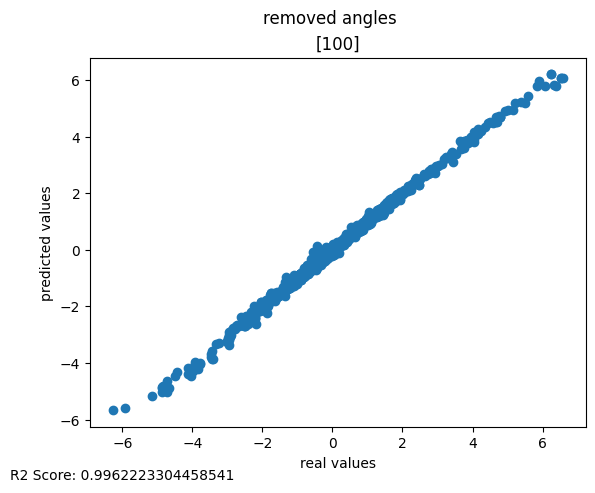

In [48]:
#scatter plot and r2 score
import sklearn
sklearn.metrics.r2_score(y_test,pred)

plt.scatter(y_test,pred)
plt.suptitle("removed angles")
plt.title(removed_angles)
plt.ylabel('predicted values')
plt.xlabel('real values')
plt.figtext(0, 0, "R2 Score: "+str(sklearn.metrics.r2_score(y_test,pred)), fontsize=10)
plt.show()

# Saving model

In [47]:
#model.save('CPL_meV.h5')